<a href="https://colab.research.google.com/github/imen-g/Deep-Learning/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


# **Importing the Dataset**

In [ ]:
data = pd.read_csv('train.csv',parse_dates=True) 
data.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C


**Data processing**






In [ ]:

data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

**To get a general idea about the data we are working with we can try to plot some graphs that helps us better visualize it and try to find some correlation between the features**


Text(0, 0.5, 'num people')

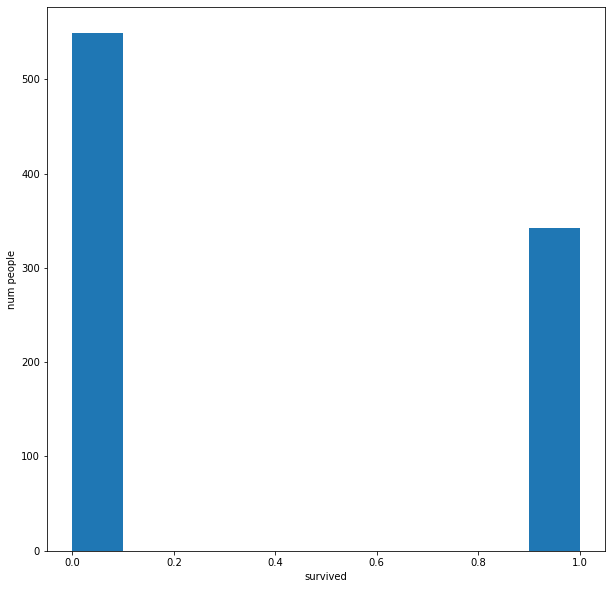

In [ ]:

from matplotlib.pyplot import figure
 
figure(num=None, figsize=(10, 10))
plt.hist(data['Survived'])
plt.xlabel('survived')
plt.ylabel('num people')

**Data normalization**

In [ ]:
data.isna().sum() #Checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Age'].fillna(0,inplace=True) 
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For better performance of our model we need to keep numerical values between 0 and 1

In [ ]:
data.max() #displays the max of every column

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [ ]:
#We devide every value by the max of its respective column
#data['PassengerId '] = data['PassengerId']/891
data['Pclass'] = data['Pclass']/3
data['Age'] = data['Age']/80
data['SibSp'] = data['SibSp']/8
data['Parch'] = data['Parch']/6
data['Fare'] = data['Fare']/512.329


In [ ]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,1.000000,"Abbott, Mr. Rossmore Edward",male,0.2000,0.125,0.166667,C.A. 2673,0.039525,NaN,S
591,592,1,0.333333,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,0.6500,0.125,0.000000,36947,0.152766,D20,C
169,170,0,1.000000,"Ling, Mr. Lee",male,0.3500,0.000,0.000000,1601,0.110273,NaN,S
343,344,0,0.666667,"Sedgwick, Mr. Charles Frederick Waddington",male,0.3125,0.000,0.000000,244361,0.025374,NaN,S
574,575,0,1.000000,"Rush, Mr. Alfred George John",male,0.2000,0.000,0.000000,A/4. 20589,0.015713,NaN,S


**Encoding dummy variables**

In [ ]:
dummies = ['Sex']

In [ ]:
data = pd.get_dummies(data, columns=dummies)


In [ ]:
data = data.drop('Name', axis=1)

data = data.drop('Ticket', axis=1)

data = data.drop('Embarked', axis=1)
data = data.drop('Cabin', axis=1)



In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,1.000000,0.2750,0.125,0.0,0.014151,0,1
1,2,1,0.333333,0.4750,0.125,0.0,0.139136,1,0
2,3,1,1.000000,0.3250,0.000,0.0,0.015469,1,0
3,4,1,0.333333,0.4375,0.125,0.0,0.103644,1,0
4,5,0,1.000000,0.4375,0.000,0.0,0.015713,0,1


**Dividing data to features and targets**

In [ ]:

column_names = ['PassengerId','Pclass',	'Age'	,	'Fare','Sex_female',	'Sex_male','Survived']

data = data.reindex(columns=column_names) #reorder columns to simplify the work

In [ ]:
data.sample(5)

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male,Survived
471,472,1.0,0.4750,0.016908,0,1,0
81,82,1.0,0.3625,0.018543,0,1,1
80,81,1.0,0.2750,0.017567,0,1,0
595,596,1.0,0.4500,0.047138,0,1,0
764,765,1.0,0.2000,0.015176,0,1,0


In [ ]:
#Separating features and target
data = data.values
train_data =data[:,0:5]
test_data =data[:,5]

In [ ]:
# standardize data
train_data = StandardScaler().fit_transform(train_data)
test_data = StandardScaler().fit_transform(test_data.reshape(len(test_data),1))[:,0]

In [ ]:
#split the data 80% for training and 20% for testing
X_train,X_test,y_train,y_test=train_test_split(train_data,test_data,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 5)
(179, 5)
(712,)
(179,)


# **Model creation**

In [ ]:

def sigmoid(x, max_v=1.0):    
    sign = (np.sign(x) + 3)//3
    x = np.abs(x)
    res = max_v/(1 + np.exp(-x))
    res = res * sign + (1 - sign) * (max_v - res)
    return res

def der_sigmoid(x ,max_v=1.0):
    sign = (np.sign(x) + 3)//3
    x = np.abs(x)
    res = max_v/(1 + np.exp(-x))
    res = res * sign + (1 - sign) * (max_v - res)
    return res*(1.0 - res)

**Perceptron**

In [ ]:
class Perceptron: 
  def __init__(self, inputs):
    self.inputs = inputs # valeurs te3na
    self.input_neurons =  len(X_train[0]) #nbr input neurons
    self.hidden_neurons = 5 #nbr hidden neurons

    self.input_weights = np.random.random((self.input_neurons, self.hidden_neurons))  # input weights 
    self.output_weights = np.random.random((self.hidden_neurons, len(X_train[0])))
  
  def predict(self, inps):
    s1 = sigmoid(np.dot(inps, self.input_weights))
    return sigmoid(np.dot(s1, self.output_weights))
  
  def train(self, t_inputs, t_outputs, epochs): #epochs hiya nafsha nbr itérations
    for i in range(epochs):
      s1 = sigmoid(np.dot(t_inputs, self.input_weights))
      s2 = sigmoid(np.dot(s1, self.output_weights))


      # calcul erreur et delta output layer
      ol_error = t_outputs - s2
      ol_delta = np.multiply(ol_error, der_sigmoid(ol_error))

      # calcul erreur et delta hidden layer
      hl_error =  np.dot(ol_delta, self.output_weights.T)
      hl_delta = np.multiply(hl_error, der_sigmoid(hl_error))

      self.input_weights += np.dot(t_inputs.T, hl_delta)
      self.output_weights += np.dot(s2.T, ol_delta)

      print(np.mean( np.abs((ol_error))))
      

model = Perceptron(6)

In [ ]:
y_train = y_train.reshape(-1,1)

In [ ]:

model.train(X_train, y_train, 100)


0.729761431458924
0.7297445479321224
0.7299411835181051
0.7299366014200562
0.7299320300485876
0.7299274695725682
0.7299229201585762
0.7299183819708789
0.7299138551714075
0.7299093399197374
0.7299048363730672
0.7299003446862001
0.7298958650115244
0.7298913974989971
0.7298869422961276
0.7298824995479618
0.729878069397068
0.7298736519835239
0.7298692474449037
0.7298648559162672
0.7298604775301486
0.7298561124165487
0.7298517607029246
0.7298474225141829
0.7298430979726738
0.7298387871981844
0.7298344903079348
0.7298302074165742
0.7298259386361778
0.729821684076245
0.7298174438436987
0.7298132180428843
0.7298090067755717
0.7298048101409556
0.7298006282356589
0.7297964611537355
0.7297923089866729
0.7297881718233878
0.7297840497501511
0.7297799428498883
0.7297758511958451
0.7297717747927035
0.7297677130153333
0.7297636591505332
0.7297595464926412
0.7297546868156135
0.7297482889448873
0.7297852594429304
0.7297815532140582
0.7297778593797648
0.7297741779949468
0.7297705090823313
0.7297668523667

In [ ]:
 preds = model.predict(X_test)
 print(preds)

[[0.         1.         0.         0.         0.        ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.         1.         0.         0.         0.        ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.         1.         0.         0.         0.        ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.         1.         0.         0.         0.        ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.         1.         0.         0.         0.        ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.         1.         0.         0.         0.        ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.50000005 0.50000005 0.50000005 0.50000005 0.50000005]
 [0.         1.         0.         0.         0.        ]
 [0.5        0

In [ ]:
preds = np.around(preds)
print(preds.shape)

(179,)


In [ ]:
preds=np.argmax(preds, axis=1)

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
accuracy_score(y_test, preds, normalize=True, sample_weight=None)

0.6312849162011173